# 230968038_HIMANJALI GANAPA_WEEK7
## EXERCISE 1: Time Series Analysis
Use the “employment.csv”  data set and perform time series analysis and visualization through the 
following questions.  
1. Convert datestamp column to a datetime object and Set the datestamp columns as the index of your DataFrame. Check if there are missing values in each column.  
2. Generate a boxplot to find the distribution of unemployment rate for every industry . 
3. Using line chart Visualize the unemployment rate of workers by industry . 
4. Plot the monthly and yearly trends . 
5. Apply time series decomposition to your dataset to visualize the trend and seasonality . 
6. Visualize the seasonality of Agriculture, Health and Finance sector.  
7. Visualize the seasonality of multiple time series and the correlation between each time series in the dataset. 

In [5]:
import pandas as pd
import datetime as dt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("D:\\230968038- HIMANJALI GANAPA\\DA Lab\\employment.csv")
df

,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
0,2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
1,2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2,2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
3,2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
4,2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,2009-10-01,11.8,10.3,18.7,12.9,6.0,7.0,3.5,8.2,12.4,12.2,10.8,10.9,8.5,5.9,8.6,9.6
118,2009-11-01,12.6,10.6,19.4,12.7,5.5,6.7,3.4,7.6,11.9,12.5,12.0,12.0,8.0,5.7,8.5,9.2
119,2009-12-01,19.7,10.3,22.7,13.3,5.6,7.2,3.6,8.5,12.6,11.9,11.8,9.5,8.2,5.9,9.0,9.1
120,2010-01-01,21.3,11.1,24.7,14.1,5.5,6.6,4.3,10.0,14.2,13.0,9.1,11.1,10.0,7.2,11.3,10.5


In [3]:
#1. Convert datestamp column to a datetime object and Set the datestamp columns as the index of your DataFrame. Check if there are missing values in each column. 
df['datestamp'] = pd.to_datetime(df['datestamp'])
df.set_index('datestamp', inplace=True)
missing_values = df.isna().sum()
print(missing_values)

Agriculture                       0
Business services                 0
Construction                      0
Durable goods manufacturing       0
Education and Health              0
Finance                           0
Government                        0
Information                       0
Leisure and hospitality           0
Manufacturing                     0
Mining and Extraction             0
Nondurable goods manufacturing    0
Other                             0
Self-employed                     0
Transportation and Utilities      0
Wholesale and Retail Trade        0
dtype: int64


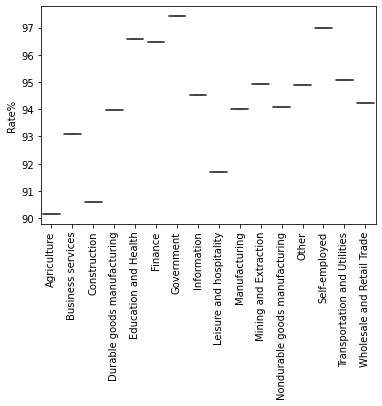

In [4]:
#2.Generate a boxplot to find the distribution of unemployment rate for every industry . 
unemp=100 - df.mean()
unemp=pd.DataFrame(unemp,columns=['Rate%'])
sns.boxplot(data=unemp,x=unemp.index,y='Rate%')
plt.xticks(rotation=90)
plt.show()

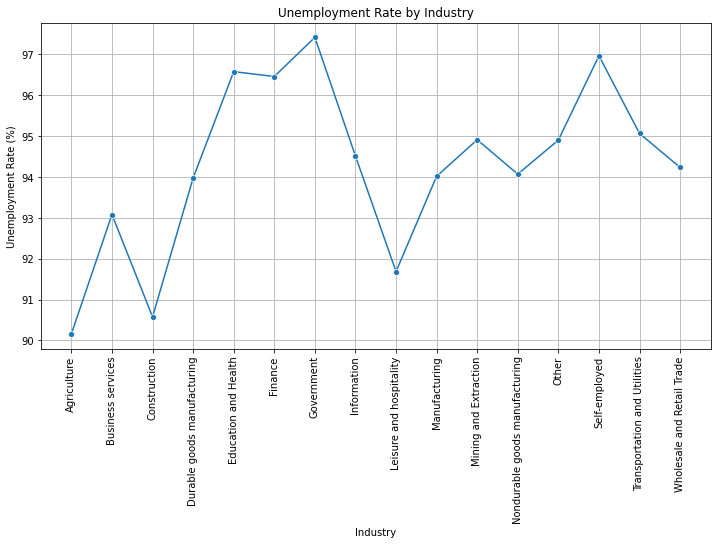

In [5]:
#3.Using line chart Visualize the unemployment rate of workers by industry .
unemp_df = pd.DataFrame(unemp, columns=['Rate%'])
unemp_df = unemp_df.reset_index()
unemp_df.columns = ['Industry', 'Rate%']
plt.figure(figsize=(12, 6))
sns.lineplot(data=unemp_df, x='Industry', y='Rate%', marker='o')
plt.xticks(rotation=90)
plt.title('Unemployment Rate by Industry')
plt.xlabel('Industry')
plt.ylabel('Unemployment Rate (%)')
plt.grid(True)
plt.show()

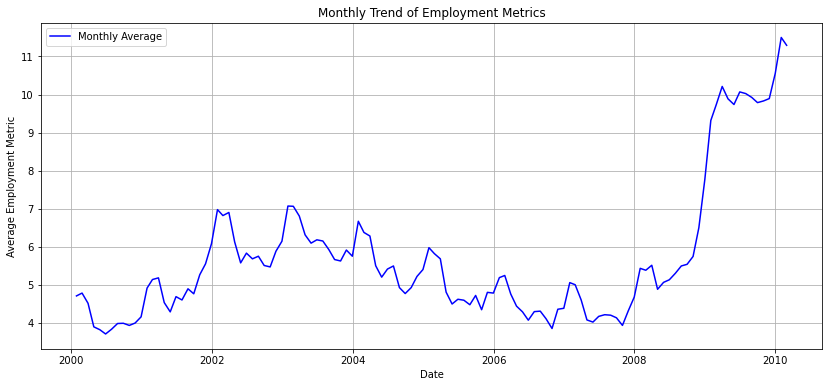

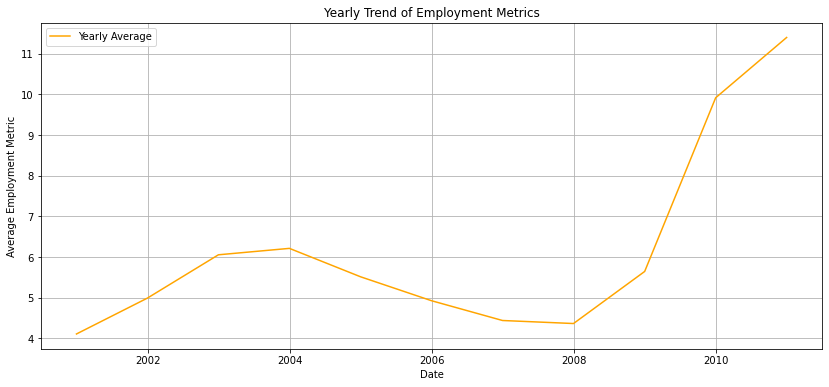

In [6]:
# Resample to monthly and yearly data
monthly_trends = df.resample('M').mean()
yearly_trends = df.resample('Y').mean()

# Plot monthly trends
plt.figure(figsize=(14, 6))
plt.plot(monthly_trends.index, monthly_trends.mean(axis=1), label='Monthly Average', color='blue')
plt.title('Monthly Trend of Employment Metrics')
plt.xlabel('Date')
plt.ylabel('Average Employment Metric')
plt.legend()
plt.grid(True)
plt.show()

# Plot yearly trends
plt.figure(figsize=(14, 6))
plt.plot(yearly_trends.index, yearly_trends.mean(axis=1), label='Yearly Average', color='orange')
plt.title('Yearly Trend of Employment Metrics')
plt.xlabel('Date')
plt.ylabel('Average Employment Metric')
plt.legend()
plt.grid(True)
plt.show()

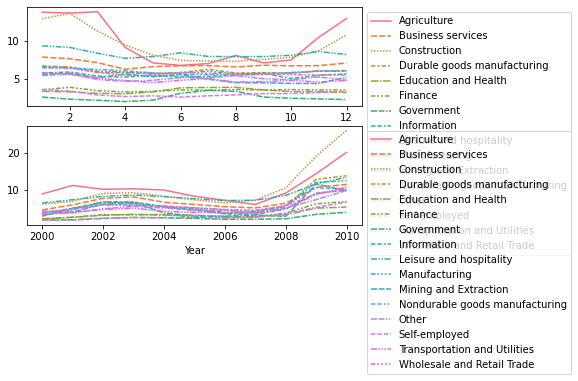

In [7]:
#4.Plot the monthly and yearly trends.
time=df.reset_index()
time['datestamp']=pd.to_datetime(time['datestamp'])
time['Month']=time['datestamp'].dt.month
time['Year']=time['datestamp'].dt.year
time.drop('datestamp',axis=1,inplace=True)
month=time.drop('Year',axis=1).groupby('Month').mean()
year=time.drop('Month',axis=1).groupby('Year').mean()
plt.subplot(2,1,1)
sns.lineplot(data=month)
plt.legend(loc='best',bbox_to_anchor=(1,1))
plt.subplot(2,1,2)
sns.lineplot(data=year)
plt.legend(loc='best',bbox_to_anchor=(1,1))

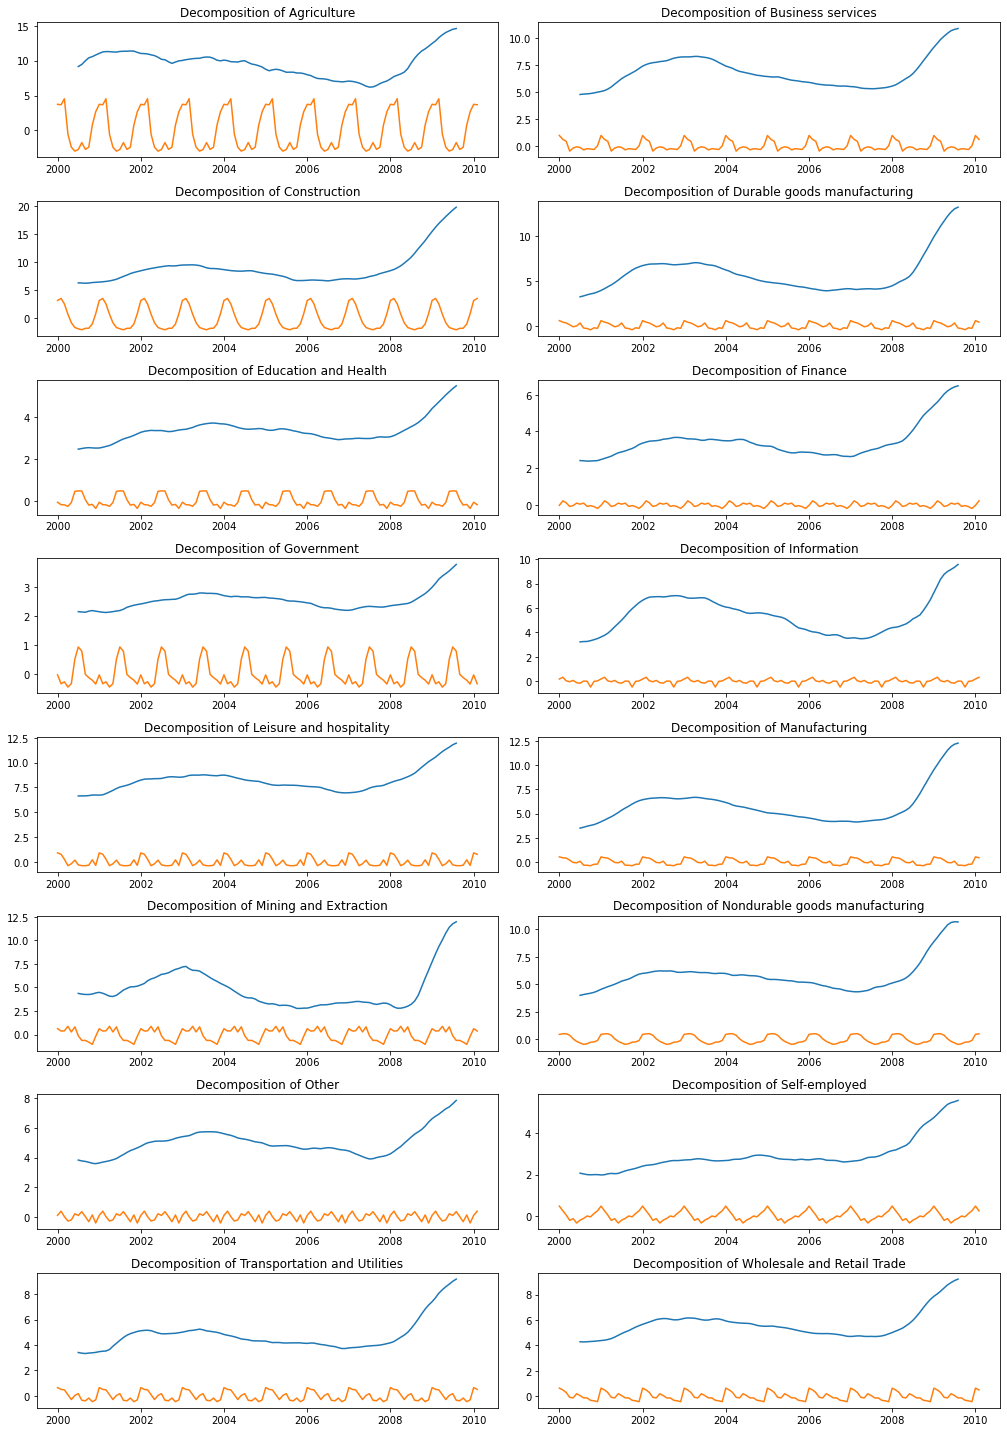

In [8]:
#5.Apply time series decomposition to your dataset to visualize the trend and seasonality .
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(14,20))
# Decompose the time series for each industry
for i,col in enumerate(df.columns,start=1):
    plt.subplot(8,2,i)
    s=seasonal_decompose(df[col],model='additive')
    plt.plot(s.trend)
    plt.plot(s.seasonal)
    plt.title(f'Decomposition of {col}')
plt.tight_layout()
plt.show()


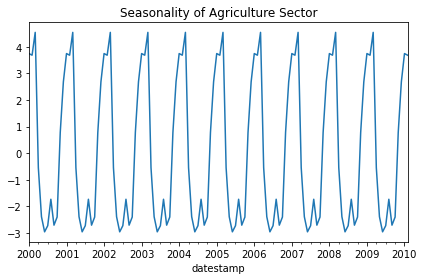

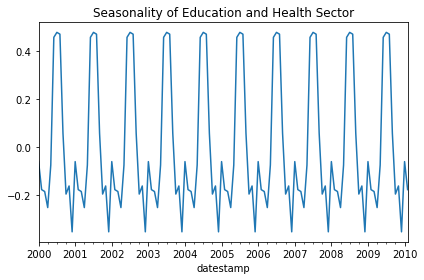

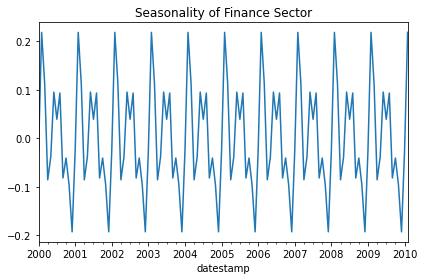

In [9]:
#6.Visualize the seasonality of Agriculture, Health and Finance sector. 
sectors = ['Agriculture', 'Education and Health', 'Finance']
for sector in sectors:
    decomposition = seasonal_decompose(df[sector], model='additive')
    decomposition.seasonal.plot()
    plt.title(f'Seasonality of {sector} Sector')
    plt.tight_layout()
    plt.show()

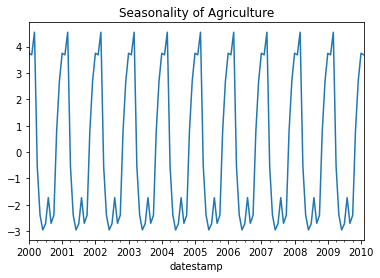

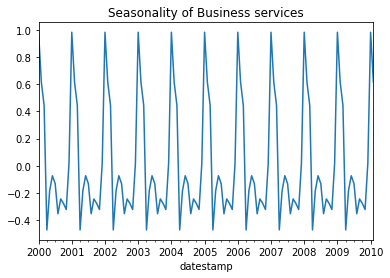

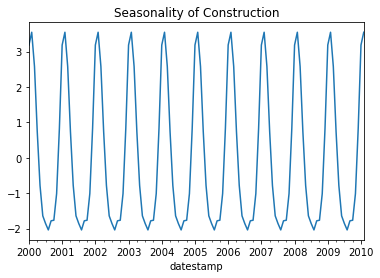

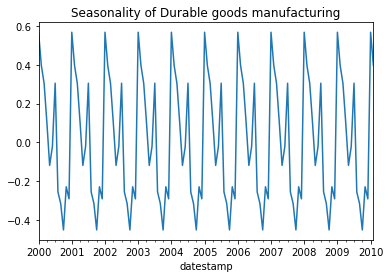

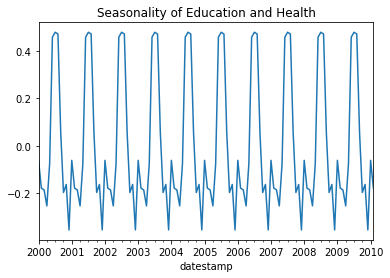

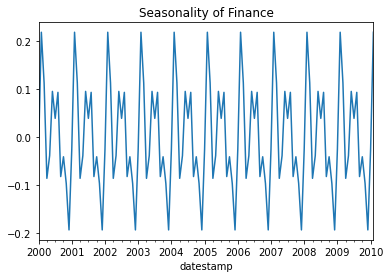

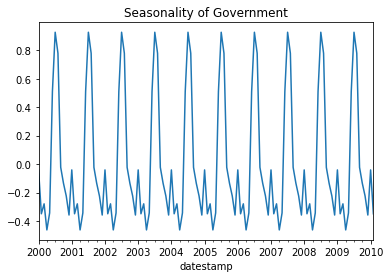

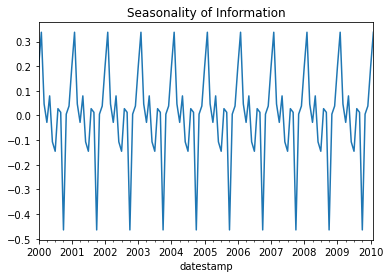

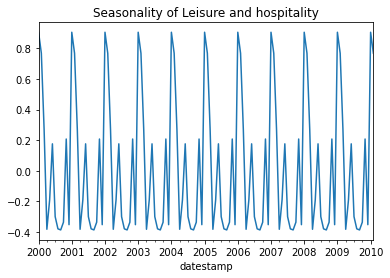

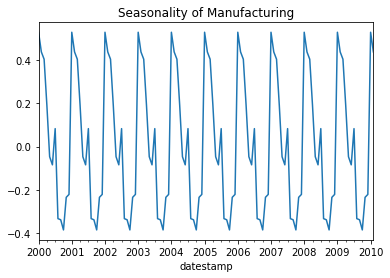

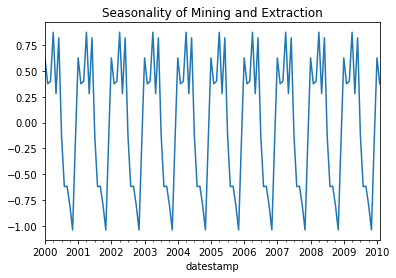

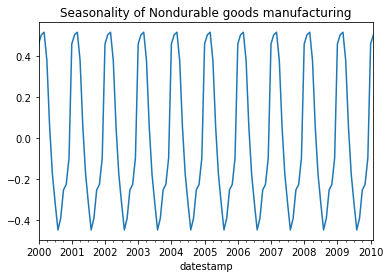

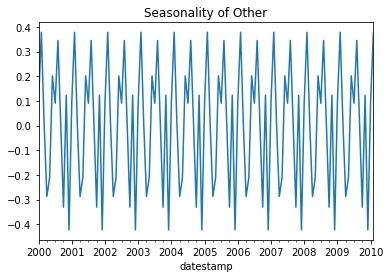

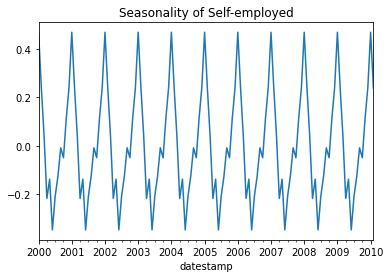

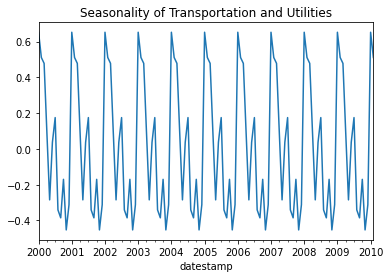

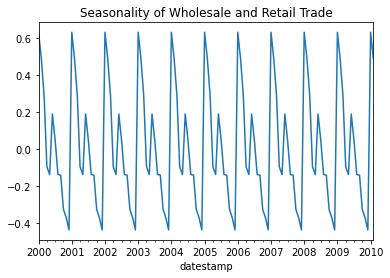

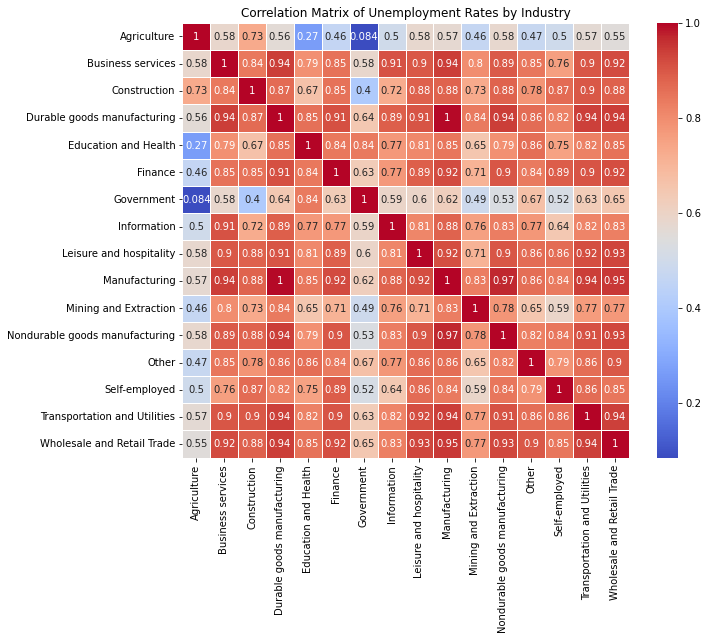

In [10]:
#7.Visualize the seasonality of multiple time series and the correlation between each time series in the dataset. 
# Plot seasonality for all industries
for column in df.columns:
    decomposition = seasonal_decompose(df[column], model='additive')
    decomposition.seasonal.plot()
    plt.title(f'Seasonality of {column}')
    plt.show()

# Plot correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Unemployment Rates by Industry')
plt.show()

## EXERCISE 2 : Text Analysis 
Download the amazon_baby.zip file and answer the following: 
1. Check the number of the reviews received for each product.  
2. Check the products that have more than 15 reviews.  
3. Find any missing review are present or not, If present remove those data.  
4. Clean the data and remove the special characters and replace the contractions with its 
expansion by converting the uppercase character to lower case. Also, remove the 
punctuations.  
5. Add the Polarity, length of the review, the word count and average word length of 
each review.  
6. Visualize the distribution of the word count, review length, and polarity.  
7. Visualize polarity considering the rating.  
8. Visualize the count of the reviews of each rating available in the dataset.  
9. List the Top 20 products based on the polarity.  
10. Visualize to check whether the review length changes with rating.  
11. Visualize the distribution of Top 25 Unigram, Bigram and Trigram. 

In [6]:
db=pd.read_csv("D:\\230968038- HIMANJALI GANAPA\\DA Lab\\amazon_baby.csv.zip")
db

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5


In [7]:
#1.Check the number of the reviews received for each product.  
a=pd.DataFrame(db.name.value_counts())
a

,name
Vulli Sophie the Giraffe Teether,785
"Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L",562
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision,561
Baby Einstein Take Along Tunes,547
"Cloud b Twilight Constellation Night Light, Turtle",520
...,...
The Kids Room The Princess Sleeps Here with Green and Pink Oval Wall Plaque,1
Disney Baby Mickey Mouse Fleece Baby Blanket Embroidered Appliqued,1
Philips AVENT BPA Free 6-Pack Bottles - 9 oz.,1
Philips AVENT 4 Oz. BPA Free Bottles - 6 Pack,1


In [8]:
#2.Check the products that have more than 15 reviews.
b=a[a['name']>15]
b

,name
Vulli Sophie the Giraffe Teether,785
"Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L",562
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision,561
Baby Einstein Take Along Tunes,547
"Cloud b Twilight Constellation Night Light, Turtle",520
...,...
"Summer Infant Keep Me Clean Disposable Potty Protectors, Green/White,(Pack of 2), 10-Count",16
Vulli Products - Sophie The Giraffe Teething Ring - Gift Boxed! - 100% Natural rubber,16
"Itzy Ritzy Shopping Cart and High Chair Cover, Avocado Damask",16
The First Years American Red Cross Deluxe Baby Healthcare and Grooming Kit,16


In [9]:
#3. Find any missing review are present or not, If present remove those data.  
c=pd.DataFrame(db.dropna(subset=['review']))
c

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5


In [10]:
#4.Clean the data and remove the special characters and replace the contractions with its expansion by converting the uppercase
#character to lower case. Also, remove the punctuations.
import re
db['review'] = db['review'].astype(str)
def clean_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z0-9\s]", '', text) 
    text = re.sub(r"\bcan't\b", "cannot", text)
    text = re.sub(r"\bwon't\b", "will not", text)
    return text
if 'review' in db.columns:
    db['cleaned_review'] = db['review'].apply(clean_text)
else:
    print("The 'review' column is missing.")

print(db.head())

                                                name  \
0                           Planetwise Flannel Wipes   
1                              Planetwise Wipe Pouch   
2                Annas Dream Full Quilt with 2 Shams   
3  Stop Pacifier Sucking without tears with Thumb...   
4  Stop Pacifier Sucking without tears with Thumb...   

                                              review  rating  \
0  These flannel wipes are OK, but in my opinion ...       3   
1  it came early and was not disappointed. i love...       5   
2  Very soft and comfortable and warmer than it l...       5   
3  This is a product well worth the purchase.  I ...       5   
4  All of my kids have cried non-stop when I trie...       5   

                                      cleaned_review  
0  these flannel wipes are ok but in my opinion n...  
1  it came early and was not disappointed i love ...  
2  very soft and comfortable and warmer than it l...  
3  this is a product well worth the purchase  i h...  
4  

In [11]:
pip install textblob

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
#5.Add the Polarity, length of the review, the word count and average word length of each review.
from textblob import TextBlob
def average_word_length(text):
    words = text.split()
    return sum(len(word) for word in words) / len(words) if words else 0

# Calculate Polarity, length of the review, word count, and average word length
db['polarity'] = db['cleaned_review'].apply(lambda x: TextBlob(x).sentiment.polarity)
db['review_length'] = db['cleaned_review'].apply(len)
db['word_count'] = db['cleaned_review'].apply(lambda x: len(x.split()))
db['avg_word_length'] = db['cleaned_review'].apply(average_word_length)

# Display the first few rows of the DataFrame to verify the new columns
print(db.head())

                                                name  \
0                           Planetwise Flannel Wipes   
1                              Planetwise Wipe Pouch   
2                Annas Dream Full Quilt with 2 Shams   
3  Stop Pacifier Sucking without tears with Thumb...   
4  Stop Pacifier Sucking without tears with Thumb...   

                                              review  rating  \
0  These flannel wipes are OK, but in my opinion ...       3   
1  it came early and was not disappointed. i love...       5   
2  Very soft and comfortable and warmer than it l...       5   
3  This is a product well worth the purchase.  I ...       5   
4  All of my kids have cried non-stop when I trie...       5   

                                      cleaned_review  polarity  review_length  \
0  these flannel wipes are ok but in my opinion n...  0.083333            443   
1  it came early and was not disappointed i love ...  0.367000            154   
2  very soft and comfortable and wa

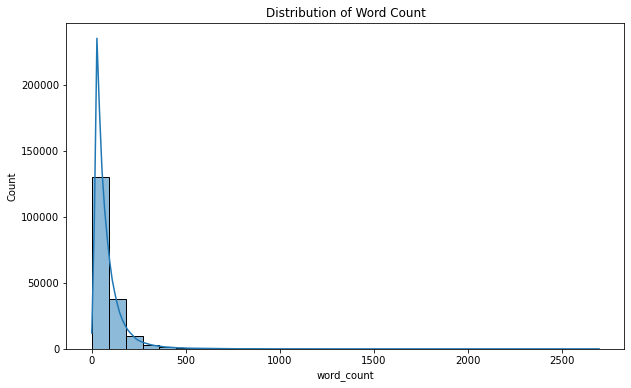

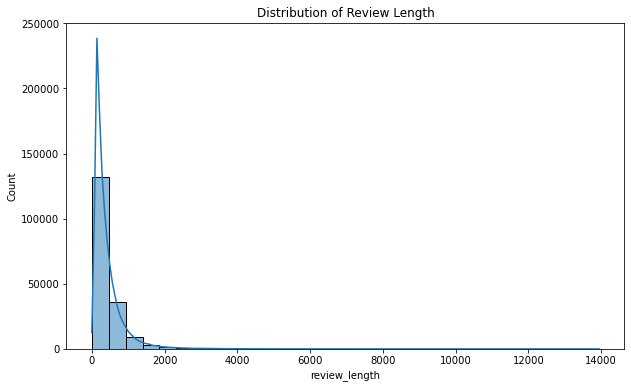

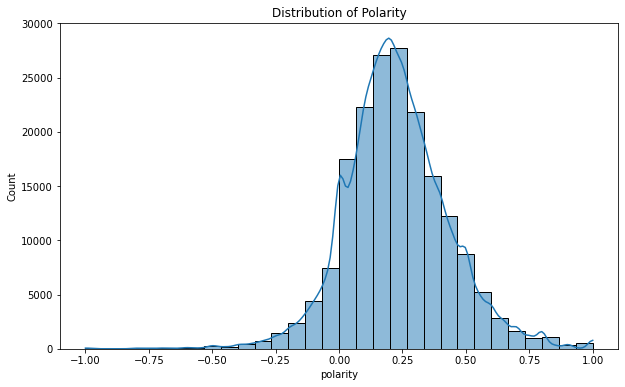

In [13]:
#6. Visualize the distribution of the word count, review length, and polarity. 
# Distribution of word count
plt.figure(figsize=(10, 6))
sns.histplot(db['word_count'], bins=30, kde=True)
plt.title('Distribution of Word Count')
plt.show()

# Distribution of review length
plt.figure(figsize=(10, 6))
sns.histplot(db['review_length'], bins=30, kde=True)
plt.title('Distribution of Review Length')
plt.show()

# Distribution of polarity
plt.figure(figsize=(10, 6))
sns.histplot(db['polarity'], bins=30, kde=True)
plt.title('Distribution of Polarity')
plt.show()


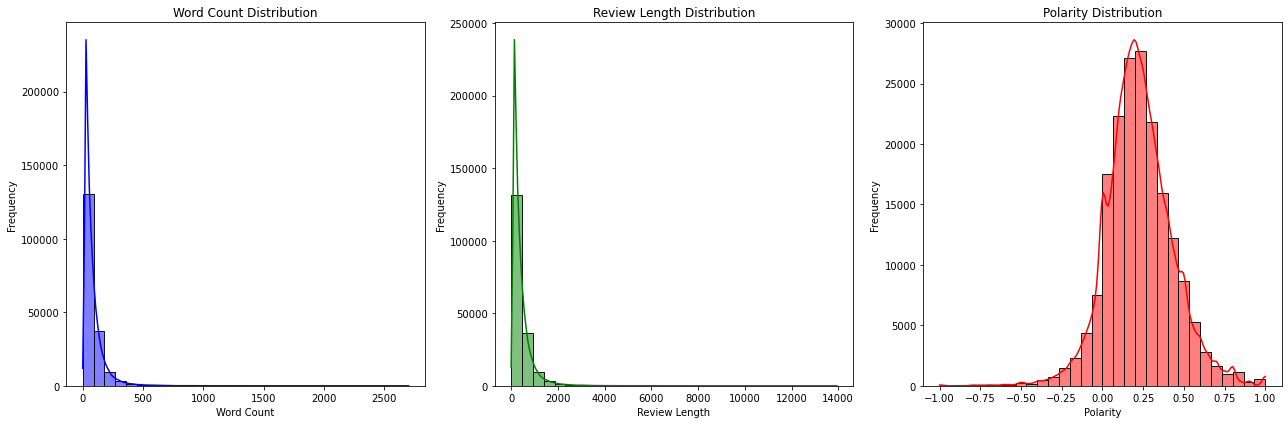

In [14]:
plt.figure(figsize=(18, 6))

# Plot for Word Count Distribution
plt.subplot(1, 3, 1)
sns.histplot(db['word_count'], bins=30, kde=True, color='blue')
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# Plot for Review Length Distribution
plt.subplot(1, 3, 2)
sns.histplot(db['review_length'], bins=30, kde=True, color='green')
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Frequency')

# Plot for Polarity Distribution
plt.subplot(1, 3, 3)
sns.histplot(db['polarity'], bins=30, kde=True, color='red')
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()

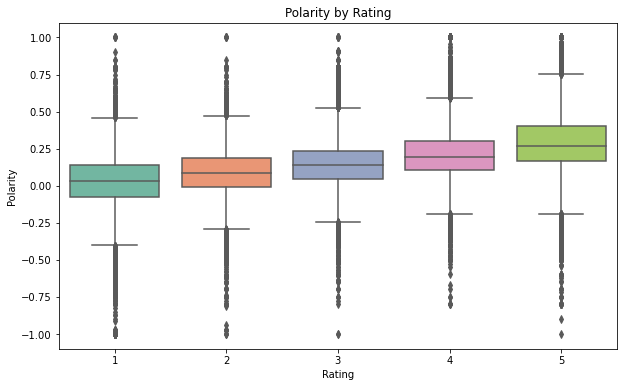

In [15]:
#7.Visualize polarity considering the rating.
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating', y='polarity', data=db, palette='Set2')
plt.title('Polarity by Rating')
plt.xlabel('Rating')
plt.ylabel('Polarity')
plt.show()

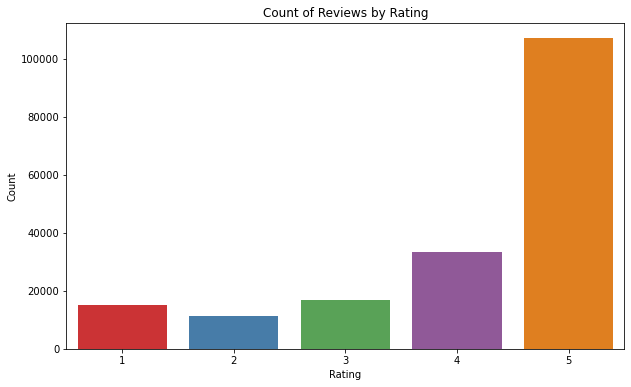

In [16]:
#8.Visualize the count of the reviews of each rating available in the dataset.  
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=db, palette='Set1')
plt.title('Count of Reviews by Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [17]:
#9. List the Top 20 products based on the polarity. 
top_products = db.groupby('name')['polarity'].mean().reset_index()
print("Top 20 Products Based on Average Polarity:")
top_products.sort_values(by='polarity',ascending=False).head(20)

Top 20 Products Based on Average Polarity:


,name,polarity
6925,Christmas Holiday Time Reusable Wall Decoratio...,1.0
20847,Nautica Kids William Window Valance,1.0
5764,"C.R. Gibson Bound Photo Journal Album, Welcome...",1.0
4349,Body Polish Vanilla Cardamom By Trillium Organics,1.0
16144,Kids Line Bunny Meadow Hamper,1.0
178,14&quot; X 32&quot; X 2&quot; Replacement Matt...,1.0
12238,Generic Classic Metal Wall Mount Jewelry Organ...,1.0
4004,BestDealUSA 2M Baby Child Safety Corner Protec...,1.0
19207,Million Dollar Baby Foothill-Louis 6-Drawer Ch...,1.0
25779,Sesame Street Elmo\'s World Bath Book ~ Opposi...,1.0


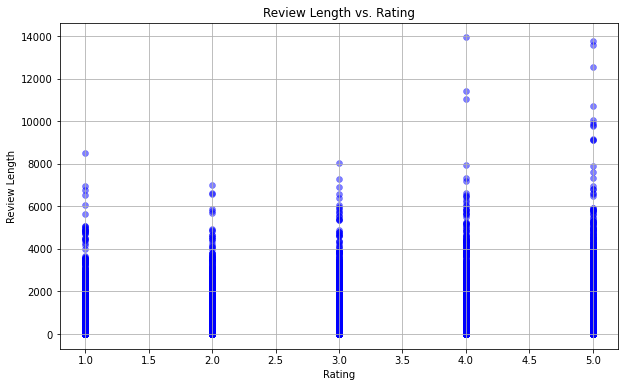

In [18]:
#10. Visualize to check whether the review length changes with rating. 
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='review_length', data=db, alpha=0.5, color='blue', edgecolor=None)

plt.title('Review Length vs. Rating')
plt.xlabel('Rating')
plt.ylabel('Review Length')
plt.grid(True)
plt.show()

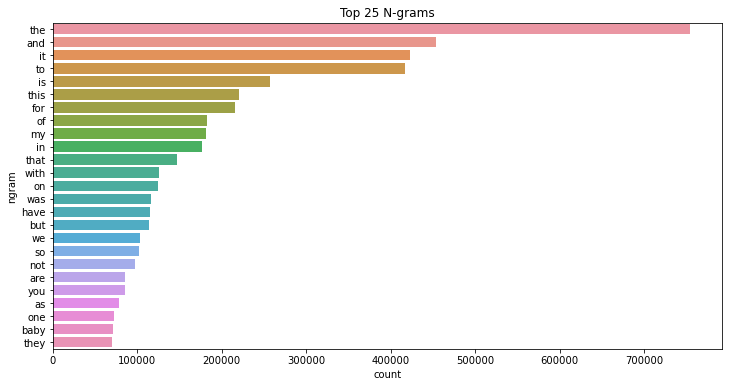

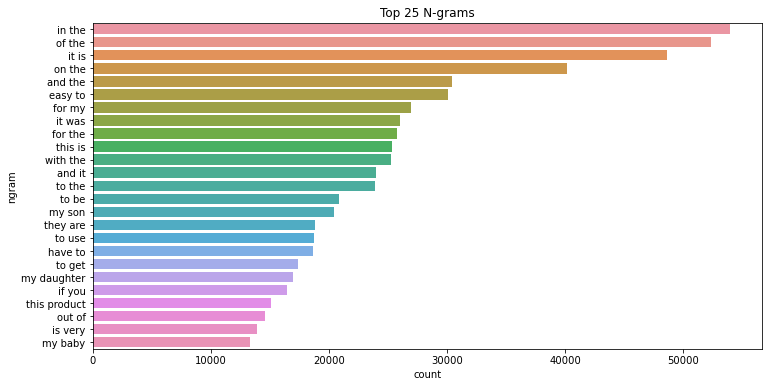

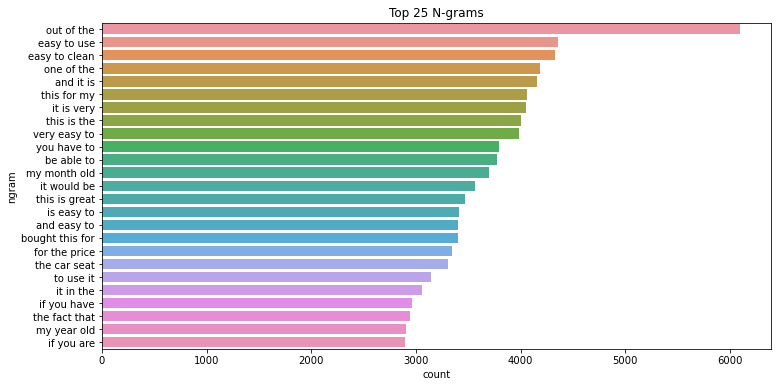

In [19]:
#11.Visualize the distribution of Top 25 Unigram, Bigram and Trigram. 
from sklearn.feature_extraction.text import CountVectorizer

# Function to plot N-grams
def plot_ngrams(ngrams, n=25):
    ngram_df = pd.DataFrame(ngrams, columns=['ngram', 'count']).nlargest(n, 'count')
    plt.figure(figsize=(12, 6))
    sns.barplot(x='count', y='ngram', data=ngram_df)
    plt.title(f'Top {n} N-grams')
    plt.show()

# Unigrams
vectorizer = CountVectorizer(ngram_range=(1, 1))
unigrams = vectorizer.fit_transform(db['cleaned_review'])
unigram_counts = unigrams.sum(axis=0)
unigram_counts = [(word, unigram_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
plot_ngrams(unigram_counts)

# Bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
bigrams = vectorizer.fit_transform(db['cleaned_review'])
bigram_counts = bigrams.sum(axis=0)
bigram_counts = [(word, bigram_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
plot_ngrams(bigram_counts)

# Trigrams
vectorizer = CountVectorizer(ngram_range=(3, 3))
trigrams = vectorizer.fit_transform(db['cleaned_review'])
trigram_counts = trigrams.sum(axis=0)
trigram_counts = [(word, trigram_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
plot_ngrams(trigram_counts)